In [3]:
from google.colab import files
uploaded = files.upload()

Saving House_prediction.csv to House_prediction.csv


In [4]:
import io
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['House_prediction.csv']))
print(df.to_string())

                 city   area  rooms  bathroom  parking spaces floor     animal      furniture  hoa (R$)  rent amount (R$)  property tax (R$)  fire insurance (R$)  total (R$)
0           São Paulo     70      2         1               1     7      acept      furnished      2065              3300                211                   42        5618
1           São Paulo    320      4         4               0    20      acept  not furnished      1200              4960               1750                   63        7973
2        Porto Alegre     80      1         1               1     6      acept  not furnished      1000              2800                  0                   41        3841
3        Porto Alegre     51      2         1               0     2      acept  not furnished       270              1112                 22                   17        1421
4           São Paulo     25      1         1               0     1  not acept  not furnished         0               800         

In [6]:
import numpy as np
cities = []
ind = []
tot = []
room = []
par = []
floor = []
area = [] #One method of finding the Average or mean

for i, row in df.iterrows():
  if i != 0 and row["city"] in cities:
    j = cities.index(row["city"])
    ind[j] = ind[j] + 1
    tot[j] = tot[j] + row["total (R$)"]
    room[j] = room[j] + row["rooms"]
    par[j] = par[j] + row["parking spaces"]
    if row["floor"] != "-":
      floor[j] = floor[j] + int(row["floor"])
    area[j] = area[j] + row["area"]
  else:
    cities.append(row["city"])
    ind.append(1)
    tot.append(row["total (R$)"])
    room.append(row["rooms"])
    par.append(row["parking spaces"])
    floor.append(int(row["floor"]))
    area.append(row["area"])
print(floor)

[33123, 4675, 7881, 3651, 4857]


In [7]:
tot_m = []
room_m = []
par_m = []
floor_m = []
area_m = []

for z, val in enumerate(cities):
  tot_m.append(tot[z] / ind[z])
  room_m.append(room[z] / ind[z])
  par_m.append(par[z] / ind[z])
  floor_m.append(floor[z] / ind[z])
  area_m.append(area[z] / ind[z])

properties = {
    "mean total price" : tot_m,
    "mean rooms" : room_m,
    "mean parking space" : par_m,
    "mean floor" : floor_m,
    "mean area" : area_m
}
df2 = pd.DataFrame(properties, index = cities)
print(df2.to_string())

                mean total price  mean rooms  mean parking space  mean floor   mean area
São Paulo            6380.831833    2.558859            1.877527    5.626465  158.899439
Porto Alegre         2989.782900    2.140821            1.044426    3.918692  103.609388
Rio de Janeiro       4611.684877    2.243837            0.744171    5.250500  105.347768
Campinas             3173.276671    2.355217            1.558030    4.280188  137.561547
Belo Horizonte       6315.242448    3.020668            1.955485    3.860890  207.411765


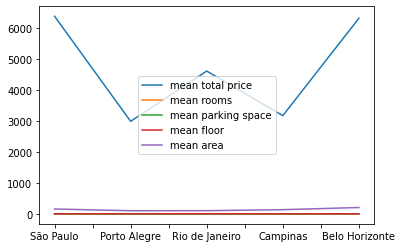

In [8]:
df2.plot()
plt.show()

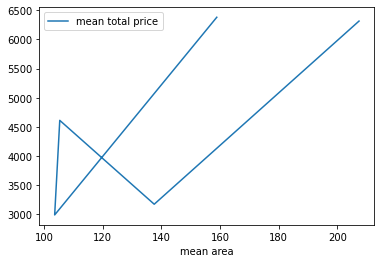

In [9]:
df2.plot(x = "mean area", y = "mean total price")
plt.show()

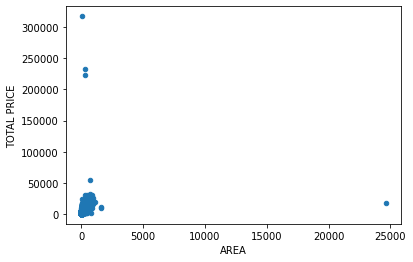

In [ ]:
#for A single city, say, Sao Paolo or City indexed 0 in cities:(price vs area)

city1_a = []
city1_p = []
for i, row in df.iterrows():
  if row["city"] == cities[0]:
    city1_a.append(row["area"])
    city1_p.append(row["total (R$)"])
di3 = {
    "AREA" : city1_a,
    "TOTAL PRICE" : city1_p
}

df3 = pd.DataFrame(di3)

df3.plot(kind = "scatter", x = "AREA", y = "TOTAL PRICE")
plt.show()

In [10]:
df.groupby('city').mean()#mean using groupby() method

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
city,,,,,,,,,
Belo Horizonte,207.411765,3.020668,2.402226,1.955485,2324.197138,3664.127981,272.782194,53.675676,6315.242448
Campinas,137.561547,2.355217,1.960141,1.558030,628.922626,2364.290739,147.657679,32.388042,3173.276671
Porto Alegre,103.609388,2.140821,1.725901,1.044426,491.618609,2337.699916,124.021794,36.425817,2989.782900
Rio de Janeiro,105.347768,2.243837,1.756163,0.744171,1079.432378,3232.904064,256.853431,42.483011,4611.684877
São Paulo,158.899439,2.558859,2.467641,1.877527,1169.627994,4652.793783,495.701716,62.428911,6380.831833


In [11]:
df.groupby('rooms').mean()#Using groupby to find the mean with respect to the no. of room

,area,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
rooms,,,,,,,,
1,45.112062,1.086797,0.489405,1449.411573,2027.854931,203.370416,26.719641,3707.640994
2,82.173109,1.562353,0.989916,624.528403,2462.187227,134.546218,32.880672,3254.217815
3,166.724992,2.595289,1.948914,1097.208626,4482.279596,369.907617,60.977057,6010.659223
4,314.054224,3.893443,3.184111,1875.482346,7155.170240,888.208701,98.583859,10017.626103
5,501.274306,4.631944,4.041667,1880.079861,8227.239583,1024.631944,122.767361,11255.065972
6,425.573529,4.808824,3.926471,483.205882,7466.397059,928.926471,117.382353,8996.088235
7,464.277778,5.388889,3.861111,45.861111,8865.277778,917.305556,137.777778,9966.638889
8,468.545455,5.363636,3.454545,40.909091,9872.727273,786.636364,156.818182,10857.272727
9,400.000000,4.000000,4.000000,100.000000,12000.000000,500.000000,181.000000,12780.000000


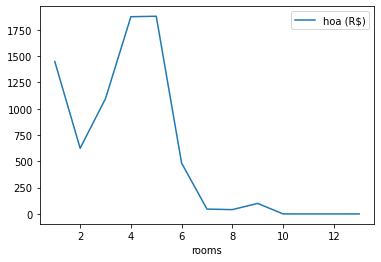

In [12]:
df.groupby('rooms').mean().plot(y = 'hoa (R$)')#Variation for number of rooms with the house assocation tax with number of rooms
plt.show()

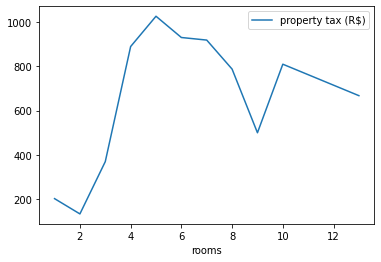

In [13]:
df.groupby('rooms').mean().plot( y = 'property tax (R$)')#With increase in the rooms the property tax also increases but also decreases 
plt.show()

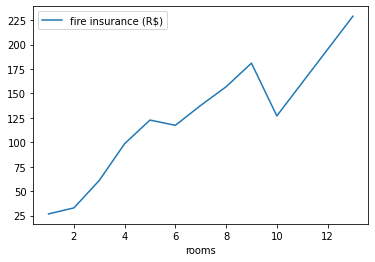

In [14]:
df.groupby('rooms').mean().plot( y = 'fire insurance (R$)')#Generally with increase in the rooms the fire insurance also increases
plt.show()

In [16]:
fur_mean = df.groupby('furniture').mean()
fur_mean

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
furniture,,,,,,,,,
furnished,156.950883,2.339601,2.281274,1.595932,1267.761704,4882.28703,372.097467,65.229087,6587.506907
not furnished,146.725699,2.559733,2.222483,1.613406,1143.810660,3578.46092,364.966238,49.456592,5136.933465


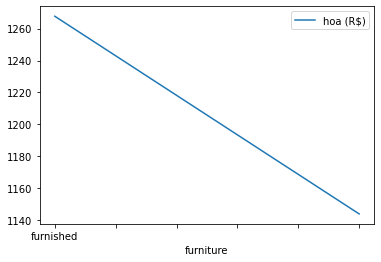

In [18]:
fur_mean.plot(y = 'hoa (R$)')
plt.show()

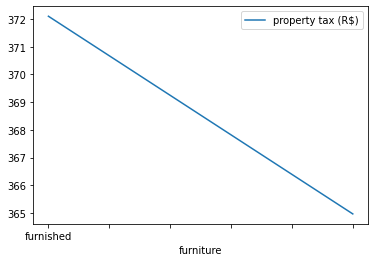

In [19]:
fur_mean.plot(y = 'property tax (R$)')
plt.show()

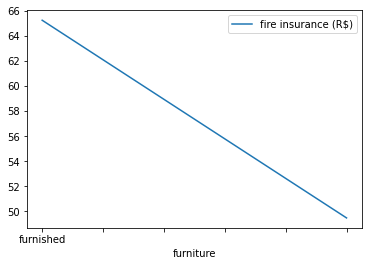

In [20]:
fur_mean.plot(y = 'fire insurance (R$)')
plt.show()